In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#1.Import and store the data in a data frame. (2.5 points)
Airline=pd.read_csv('airline.csv',header=0)
Airline.head(5)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [15]:
Airline.shape

(1000, 11)

2.Remove the outliers from the data (5 points)

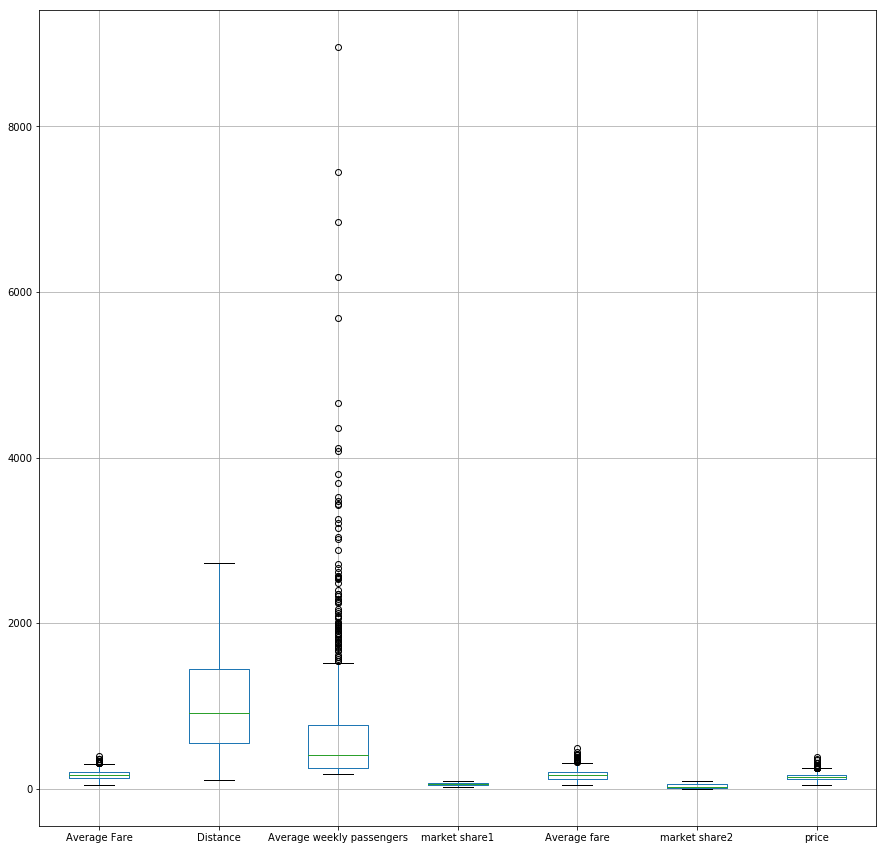

In [9]:
# Let us check outliers using boxplot
Airline.boxplot(column=['Average Fare','Distance','Average weekly passengers','market share1','Average fare','market share2','price'],figsize=(15,15)) # By using the box plot we can indetify the outliers from data

In [12]:
# Let us calculate IQR
Q1=Airline.quantile(0.25)
Q3=Airline.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share1                 27.0000
Average fare                  78.8925
market share2                 39.7775
price                         54.7625
dtype: float64


In [17]:
Airline_out = Airline[~((Airline[['Average Fare','Distance','Average weekly passengers','market share1','Average fare','market share2','price']] < (Q1 - 1.5 * IQR)) |(Airline[['Average Fare','Distance','Average weekly passengers','market share1','Average fare','market share2','price']] > (Q3 + 1.5 * IQR))).any(axis=1)]
Airline_out.shape

(885, 11)

3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [136]:
X=Airline_out[['Distance','market share1','Average fare','market share2','price']] #Independent Variables
Y=Airline_out["Average Fare"] #dependent Variable 

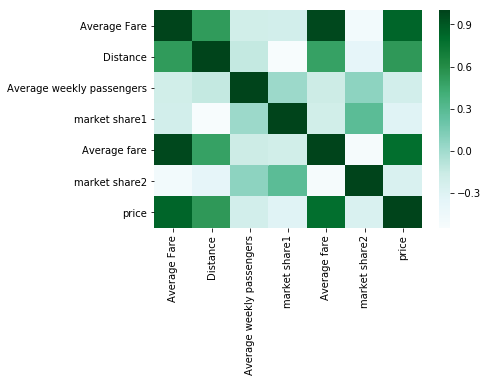

In [18]:
sns.heatmap(Airline_out.corr(),cmap='BuGn')

In [45]:
a=Airline_out.corr()
mydata_corr = Airline_out.corr().iloc[0,:]>0.1
print(mydata_corr)

Average Fare                  True
Distance                      True
Average weekly passengers    False
market share1                False
Average fare                  True
market share2                False
price                         True
Name: Average Fare, dtype: bool


In [20]:
#From above corelation matrix its clear that we need to take Distance,Average fare,market share2,price where the value>0.1
Airline_out_corr=Airline_out
Airline_out_corr=Airline_out_corr.drop(columns='Average weekly passengers')
Airline_out_corr=Airline_out_corr.drop(columns='market share1')
Airline_out_corr=Airline_out_corr.drop(columns='market share2')
Airline_out_corr.head(5)

,City1,City2,Average Fare,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


In [ ]:
5.Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)


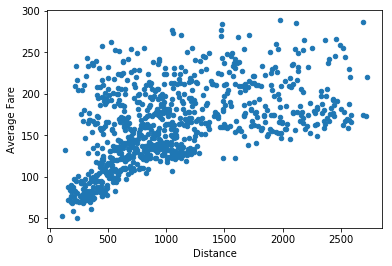

In [21]:
Airline_out_corr.plot(kind='scatter', x='Distance', y='Average Fare')

###### 6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [46]:
X=Airline_out[['Distance','Average fare','price']] #New Dependent Variables
Y=Airline_out["Average Fare"] #Independent Variable

In [47]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123)

print(Airline_out.shape)
print (train_y.shape,train_X.shape)
print  (test_y.shape,test_X.shape)

(885, 11)
(619,) (619, 3)
(266,) (266, 3)


###### 7.Print the coefficients & intercepts of the linear regression model (5 points)

In [48]:
linreg = LinearRegression()
# Let's fit our model
linreg.fit(train_X,train_y)
#preds=linreg.predict(train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
linreg.intercept_

6.213696645882209

In [50]:
linreg.coef_

array([0.00196147, 0.76071763, 0.20126215])

###### 8.Print the accuracy of the overall model (2.5 points)

In [51]:
linreg.score(train_X,train_y) #training data

0.9686687139640555

In [52]:
linreg.score(test_X,test_y) #test data

0.9758896571354787

In [53]:
linreg.score(X,Y) #entire dataset

0.9709729666441599